In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline
import os

c:\users\sripan\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000172DB860>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000172DB550>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x00000000172DB8D0>)

In [10]:
print("Training set (images) shape: {shape}".format(shape=mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=mnist.train.labels.shape))

print("Validation set (images) shape: {shape}".format(shape=mnist.validation.images.shape))
print("Validation set (labels) shape: {shape}".format(shape=mnist.validation.labels.shape))

# Shapes of test set
print("Test set (images) shape: {shape}".format(shape=mnist.test.images.shape))
print("Test set (labels) shape: {shape}".format(shape=mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000, 10)
Validation set (images) shape: (5000, 784)
Validation set (labels) shape: (5000, 10)
Test set (images) shape: (10000, 784)
Test set (labels) shape: (10000, 10)


In [ ]:
label_dict = {
 0: '0',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot',
}

Text(0.5,1,'(Label: 9)')

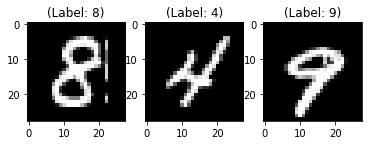

In [46]:
# Display the first image in training data
plt.subplot(131)
curr_img = np.reshape(mnist.train.images[9], (28,28))
curr_lbl = np.argmax(mnist.train.labels[9,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in validation data
plt.subplot(132)
curr_img = np.reshape(mnist.validation.images[9], (28,28))
curr_lbl = np.argmax(mnist.validation.labels[9,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

# Display the first image in testing data
plt.subplot(133)
curr_img = np.reshape(mnist.test.images[9], (28,28))
curr_lbl = np.argmax(mnist.test.labels[9,:])
plt.imshow(curr_img, cmap='gray')
plt.title("(Label: " + str(curr_lbl) + ")")

In [54]:
# Reshape training and testing image
train_X = mnist.train.images.reshape(-1, 28, 28, 1)
test_X = mnist.test.images.reshape(-1,28,28,1)

train_y = mnist.train.labels
test_y = mnist.test.labels

In [79]:
training_iters = 10
learning_rate = 0.01 
batch_size = 512

In [60]:
# MNIST data input (img shape: 28*28)
n_input = 28

# MNIST total classes (0-9 digits)
n_classes = 10

In [61]:
x = tf.placeholder("float", [None, 28,28,1])
y = tf.placeholder("float", [None, n_classes])

In [62]:
def conv2d(x, W, b, strides=1):
    # Conv2D wrapper, with bias and relu activation
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x) 

def maxpool2d(x, k=2):
    return tf.nn.max_pool(x, ksize=[1, k, k, 1], strides=[1, k, k, 1],padding='SAME')

In [64]:
weights = {
    'wc1': tf.get_variable('W0', shape=(3,3,1,32), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc2': tf.get_variable('W1', shape=(3,3,32,64), initializer=tf.contrib.layers.xavier_initializer()), 
    'wc3': tf.get_variable('W2', shape=(3,3,64,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'wd1': tf.get_variable('W3', shape=(4*4*128,128), initializer=tf.contrib.layers.xavier_initializer()), 
    'out': tf.get_variable('W6', shape=(128,n_classes), initializer=tf.contrib.layers.xavier_initializer()), 
}

biases = {
    'bc1': tf.get_variable('B0', shape=(32), initializer=tf.contrib.layers.xavier_initializer()),
    'bc2': tf.get_variable('B1', shape=(64), initializer=tf.contrib.layers.xavier_initializer()),
    'bc3': tf.get_variable('B2', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'bd1': tf.get_variable('B3', shape=(128), initializer=tf.contrib.layers.xavier_initializer()),
    'out': tf.get_variable('B4', shape=(10), initializer=tf.contrib.layers.xavier_initializer()),
}

In [65]:
def conv_net(x, weights, biases):  

    # here we call the conv2d function we had defined above and pass the input image x, weights wc1 and bias bc1.
    conv1 = conv2d(x, weights['wc1'], biases['bc1'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 14*14 matrix.
    conv1 = maxpool2d(conv1, k=2)

    # Convolution Layer
    # here we call the conv2d function we had defined above and pass the input image x, weights wc2 and bias bc2.
    conv2 = conv2d(conv1, weights['wc2'], biases['bc2'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 7*7 matrix.
    conv2 = maxpool2d(conv2, k=2)

    conv3 = conv2d(conv2, weights['wc3'], biases['bc3'])
    # Max Pooling (down-sampling), this chooses the max value from a 2*2 matrix window and outputs a 4*4.
    conv3 = maxpool2d(conv3, k=2)


    # Fully connected layer
    # Reshape conv2 output to fit fully connected layer input
    fc1 = tf.reshape(conv3, [-1, weights['wd1'].get_shape().as_list()[0]])
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    fc1 = tf.nn.relu(fc1)
    # Output, class prediction
    # finally we multiply the fully connected layer with the weights and add a bias term. 
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out

In [67]:
pred = conv_net(x, weights, biases)

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y))

optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

In [68]:
#Here you check whether the index of the maximum value of the predicted image is equal to the actual labelled image. and both will be a column vector.
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

#calculate accuracy across all the given images and average them out. 
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [69]:
# Initializing the variables
init = tf.global_variables_initializer()

In [80]:
with tf.Session() as sess:
    sess.run(init) 
    train_loss = []
    test_loss = []
    train_accuracy = []
    test_accuracy = []
    summary_writer = tf.summary.FileWriter('./Output', sess.graph)
    total_batch = int(len(mnist.train.labels) / batch_size)
    for i in range(training_iters):
        avg_cost = 0
        for batch in range(total_batch):
            batch_x = train_X[batch*batch_size:min((batch+1)*batch_size,len(train_X))]
            batch_y = train_y[batch*batch_size:min((batch+1)*batch_size,len(train_y))]    
            # Run optimization op (backprop).
            # Calculate batch loss and accuracy
            #opt = sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})
            _, loss, acc = sess.run([optimizer, cost, accuracy], feed_dict={x: batch_x,y: batch_y})
            avg_cost += loss / total_batch
        print("Iter " + str(i) + ", Loss= " + \
                      "{:.6f}".format(loss) + ", Training Accuracy= " + \
                      "{:.5f}".format(acc))
        print("Optimization Finished!")

        # Calculate accuracy for all 10000 mnist test images
        test_acc,valid_loss = sess.run([accuracy,cost], feed_dict={x: test_X,y : test_y})
        train_loss.append(loss)
        test_loss.append(valid_loss)
        train_accuracy.append(acc)
        test_accuracy.append(test_acc)
        print("Testing Accuracy:","{:.5f}".format(test_acc))
    summary_writer.close()

Iter 0, Loss= 0.297529, Training Accuracy= 0.92578
Optimization Finished!
Testing Accuracy: 0.94530
Iter 1, Loss= 0.139170, Training Accuracy= 0.96875
Optimization Finished!
Testing Accuracy: 0.97380
Iter 2, Loss= 0.095694, Training Accuracy= 0.98047
Optimization Finished!
Testing Accuracy: 0.98020
Iter 3, Loss= 0.104150, Training Accuracy= 0.97461
Optimization Finished!
Testing Accuracy: 0.97940
Iter 4, Loss= 0.077902, Training Accuracy= 0.97461
Optimization Finished!
Testing Accuracy: 0.97870
Iter 5, Loss= 0.052612, Training Accuracy= 0.98438
Optimization Finished!
Testing Accuracy: 0.98310
Iter 6, Loss= 0.046539, Training Accuracy= 0.98633
Optimization Finished!
Testing Accuracy: 0.98360
Iter 7, Loss= 0.031823, Training Accuracy= 0.98828
Optimization Finished!
Testing Accuracy: 0.98430
Iter 8, Loss= 0.026988, Training Accuracy= 0.98828
Optimization Finished!
Testing Accuracy: 0.98590
Iter 9, Loss= 0.019716, Training Accuracy= 0.99414
Optimization Finished!
Testing Accuracy: 0.98680


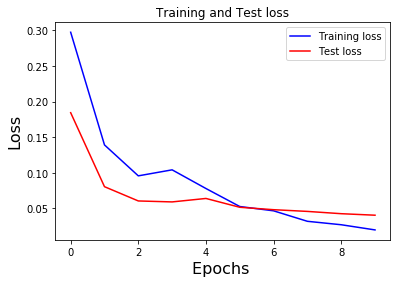

In [81]:
plt.plot(range(len(train_loss)), train_loss, 'b', label='Training loss')
plt.plot(range(len(train_loss)), test_loss, 'r', label='Test loss')
plt.title('Training and Test loss')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.legend()
plt.figure()
plt.show()

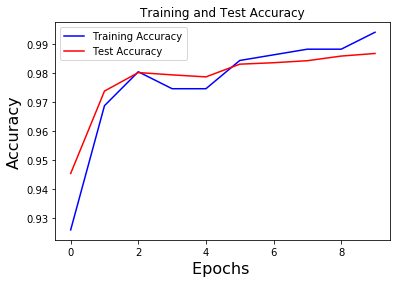

In [83]:
plt.plot(range(len(train_loss)), train_accuracy, 'b', label='Training Accuracy')
plt.plot(range(len(train_loss)), test_accuracy, 'r', label='Test Accuracy')
plt.title('Training and Test Accuracy')
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.legend()
plt.figure()
plt.show()